# Laboratorio 2

Aramayo Valdez Joaquin                  
Ingenieria de Sistemas

Link de GitHub:  https://github.com/Joaco15045F/InteligenciaArtificial/tree/main/Laboratorios/Laboratorio2

 Aquí importamos todas las librerías a utilizar

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


#importando pandas
import pandas as pd


## Regresión polinomica

Aplicamos la regresion polinomial para predecir el consumo de energía (kWh) según la configuracion de la máquina(%). Usamos el dataset machine_energy_consumption_realistic.csv donde están todos los datos.

En esta primera parte subimos y cargamos el archivo a utilizar, así como tambien elegimos los datos que se almacenaran en "X" y en "y"

In [2]:
data = 'machine_energy_consumption_realistic.csv'
df = pd.read_csv(data)

# Mostrar las primeras filas del dataframe para verificar las columnas
#df.head()
print(df.columns)

X = df['MachineSetting'].values
y = df['EnergyConsumption'].values

m = y.size  # m = numero de ejemplos de entrenamiento


Index(['MachineSetting', 'EnergyConsumption', 'Temperature', 'Pressure',
       'Humidity', 'Vibration', 'Load', 'Speed', 'Power', 'Torque', 'Voltage',
       'Current'],
      dtype='object')


In [3]:
print(X[:100])

[17.49080238 29.01428613 24.63987884 21.97316968 13.12037281 13.11989041
 11.16167224 27.32352292 22.02230023 24.16145156 10.41168989 29.39819704
 26.64885282 14.24678221 13.63649934 13.6680902  16.08484486 20.49512863
 18.63890037 15.8245828  22.23705789 12.78987721 15.84289297 17.32723687
 19.12139968 25.70351923 13.99347564 20.28468877 21.84829138 10.92900825
 22.15089704 13.41048247 11.30103186 28.97771075 29.31264066 26.16794696
 16.09227538 11.95344228 23.68466053 18.80304987 12.4407647  19.9035382
 10.68777042 28.18640804 15.17559963 23.25044569 16.23422152 20.40136042
 20.93420559 13.69708911 29.39169256 25.50265647 28.78997883 27.89654701
 21.95799958 28.4374847  11.76985004 13.91965725 10.90454578 16.50660662
 17.77354579 15.42698064 26.57475018 17.13506653 15.61869019 20.85392166
 12.8184845  26.04393962 11.49101287 29.73773873 25.44489539 13.97431363
 10.11044234 26.30922857 24.13714688 24.58014336 25.42540693 11.48089303
 17.16931457 12.31738119 27.26206852 22.46596254 16.

In [4]:
print(y[:100])

[ 1.01445844  1.44731772  0.0115307   0.18212423  0.62414935  0.59116803
  1.65679074  0.17032549 -0.59806169  0.35815328  1.67145636  1.74221625
  1.74753172  0.70114694  1.07822922  0.28431612  0.71886309 -0.20221712
  0.12948438  0.31778526  0.65574781  0.32631219 -0.77211206  0.08253257
  0.30798172  0.68532983  1.31748211  0.27735638 -0.16928817  0.35059681
  0.01425018  1.34465054  1.20128704  1.45124573  1.75348707  0.19627526
  0.64548146  2.02408133  0.19824819 -0.47849134  1.03862497 -1.05377935
  1.75955001  1.42895314  1.31334378  0.13638936  0.51878462 -0.37088462
 -0.10745682  0.00303918  1.47093446  0.41789709  1.5291348   0.81065545
  0.16128934  1.10809849  1.0922441   0.75727794  1.54136445  0.66001592
  0.08972077  0.25882478  0.70265764 -0.14906675  0.22344409  1.08404693
  0.51772303  0.53856578  1.14618883  1.55902594  0.39407943  0.84506163
  0.9304036   1.2528125   0.66135294 -0.21033196 -0.57847499  0.8544218
  0.08344892  2.39511455  1.22838203 -0.74639743 -0.

In [5]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Consumo de energia (kWh)')
    pyplot.xlabel('Configuracion de Maquina (% de Operacion)')


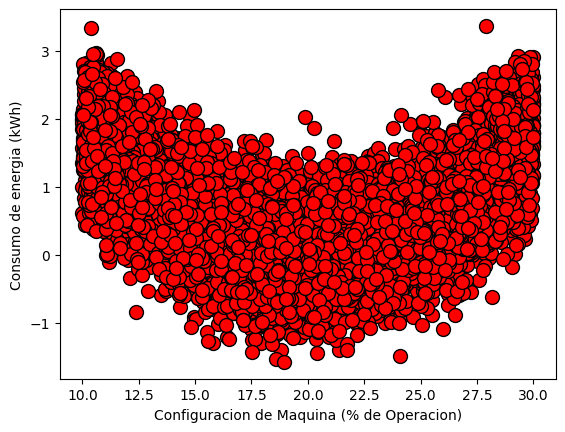

In [6]:
plotData(X, y)

Aquí procedemos a crear un array de 2 componentes [X, X^2] esto es lo primero que hacemos para ya luego ir normalizando los datos y todos esten dentro de un mismo parametro, posteriormente se hace lo mismo que los cuadernillos vistos en clase para llegar a las predicciones y comparar resultados.

In [7]:
X = np.array(X)  # Asegúrate de que X sea un array de NumPy

# Redimensiona X para que tenga una dimensión adicional
X = X.reshape(-1, 1)

# Concatenar X con X^2 a lo largo del eje 1
X = np.concatenate([X, X ** 2], axis=1)

In [8]:
print(X)

[[ 17.49080238 305.92816779]
 [ 29.01428613 841.82879953]
 [ 24.63987884 607.12362906]
 ...
 [ 11.02479082 121.54601269]
 [ 23.65923187 559.75925272]
 [ 15.02158048 225.64788013]]


In [9]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [10]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)


Media calculada: [ 19.93129446 430.59123476]
Desviación estandar calculada: [  5.77362416 232.72301759]


In [11]:
print(X_norm)

[[-0.42269674 -0.53567141]
 [ 1.57318721  1.76706872]
 [ 0.81553358  0.7585515 ]
 ...
 [-1.54261923 -1.32795297]
 [ 0.64568412  0.55502898]
 [-0.85036952 -0.88063208]]


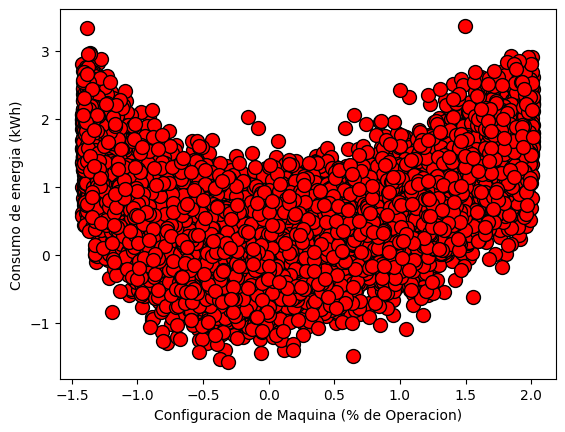

In [12]:
plotData(X_norm[:,1], y)

Aqui se añade la columna de "1"

In [13]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [14]:
print(X)

[[ 1.         -0.42269674 -0.53567141]
 [ 1.          1.57318721  1.76706872]
 [ 1.          0.81553358  0.7585515 ]
 ...
 [ 1.         -1.54261923 -1.32795297]
 [ 1.          0.64568412  0.55502898]
 [ 1.         -0.85036952 -0.88063208]]


Aqui empezamos a ver lo de "Descenso por el gradiente para ya terminal y tener las predicciones"

In [15]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [16]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

Seleccionando coheficientes de aprendizaje y cantidad de iteraciones para calcular el costo y tambien ya por fin los resultados de predicciones

theta calculado por el descenso por el gradiente: [ 0.64249115 -0.31531751  0.32670569]
El consumo de energia con una configuracion de maquina de 17 es: 1


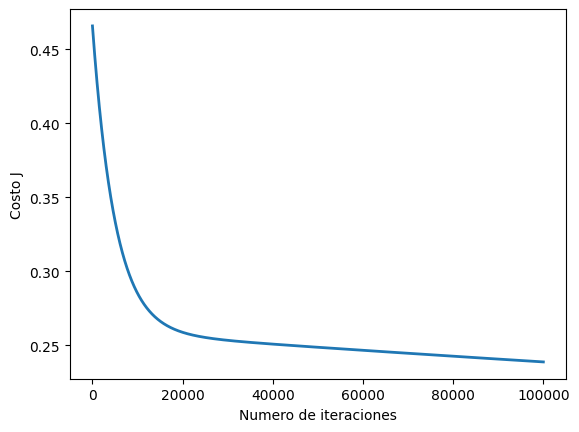

In [17]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 100000


# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = [1, 17, 17*17]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El consumo de energia con una configuracion de maquina de 17 es: {:.0f}'.format(price))

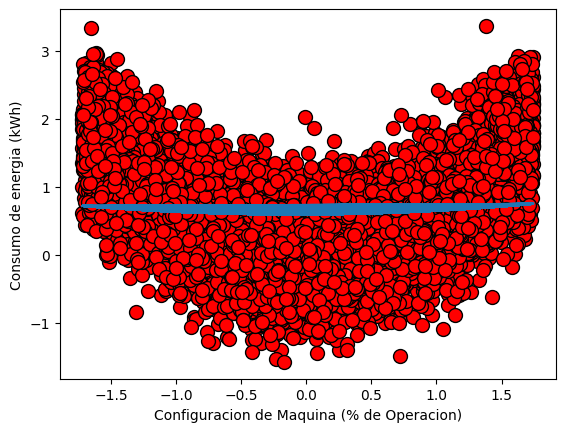

In [18]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

# PREDICCIONES
Aqui tenemos 100 predicciones de consumo de energia usando ciertas configuraciones de maquinas

In [19]:
datos_para_predecir = [17.49080238, 29.01428613, 24.63987884, 21.97316968, 13.12037281, 13.11989041,
                        11.16167224, 27.32352292, 22.02230023, 24.16145156, 10.41168989, 29.39819704,
                        26.64885282, 14.24678221, 13.63649934, 13.6680902, 16.08484486, 20.49512863,
                        18.63890037, 15.8245828, 22.23705789, 12.78987721, 15.84289297, 17.32723687,
                        19.12139968, 25.70351923, 13.99347564, 20.28468877, 21.84829138, 10.92900825,
                        22.15089704, 13.41048247, 11.30103186, 28.97771075, 29.31264066, 26.16794696,
                        16.09227538, 11.95344228, 23.68466053, 18.80304987, 12.4407647, 19.9035382,
                        10.68777042, 28.18640804, 15.17559963, 23.25044569, 16.23422152, 20.40136042,
                        20.93420559, 13.69708911, 29.39169256, 25.50265647, 28.78997883, 27.89654701,
                        21.95799958, 28.4374847, 11.76985004, 13.91965725, 10.90454578, 16.50660662,
                        17.77354579, 15.42698064, 26.57475018, 17.13506653, 15.61869019, 20.85392166,
                        12.8184845, 26.04393962, 11.49101287, 29.73773873, 25.44489539, 13.97431363,
                        10.11044234, 26.30922857, 24.13714688, 24.58014336, 25.42540693, 11.48089303,
                        17.16931457, 12.31738119, 27.26206852, 22.46596254, 16.6179605, 11.27116701,
                        16.21964643, 16.50366644, 24.59212357, 22.75114943, 27.74425485, 19.4442985,
                        12.39188492, 24.26489574, 25.21570097, 21.22554395, 25.4193436, 19.87591193,
                        20.45465659, 18.55082037, 10.50838253, 12.15782854]

In [20]:
print(theta)

[ 0.64249115 -0.31531751  0.32670569]


In [21]:
resultados = []
theta = [ 0.64249115, -0.31531751,  0.32670569]
for X in datos_para_predecir:
    X_array = [1, X, X**2]
    X_array[1:3] = (X_array[1:3] - mu) / sigma
    resultado = np.dot(X_array, theta)
    resultados.append(round(resultado, 2))  # Redondeamos el resultado a dos decimales

# Imprimir resultados de forma más legible
for resultado in resultados:
    print(resultado)

0.6
0.72
0.63
0.6
0.65
0.65
0.69
0.68
0.6
0.63
0.71
0.73
0.67
0.63
0.64
0.64
0.61
0.6
0.6
0.61
0.61
0.66
0.61
0.6
0.6
0.65
0.64
0.6
0.6
0.7
0.61
0.65
0.69
0.72
0.73
0.66
0.61
0.67
0.62
0.6
0.66
0.6
0.7
0.7
0.62
0.62
0.61
0.6
0.6
0.64
0.73
0.65
0.72
0.7
0.6
0.71
0.68
0.64
0.7
0.61
0.6
0.62
0.67
0.6
0.62
0.6
0.66
0.66
0.68
0.74
0.65
0.64
0.72
0.66
0.63
0.63
0.65
0.68
0.6
0.67
0.68
0.61
0.61
0.69
0.61
0.61
0.63
0.61
0.69
0.6
0.67
0.63
0.64
0.6
0.65
0.6
0.6
0.6
0.71
0.67


# Ecuacion de la normal
En este apartado hacemos lo mismo pero ahora usando el método de la ecuacion de la normal

In [22]:
data = 'machine_energy_consumption_realistic.csv'
df = pd.read_csv(data)

# Mostrar las primeras filas del dataframe para verificar las columnas


X = df['MachineSetting'].values
y = df['EnergyConsumption'].values
X_original = X.copy()
X = np.array(X)  # Asegúrate de que X sea un array de NumPy

# Redimensiona X para que tenga una dimensión adicional
X = X.reshape(-1, 1)

# Concatenar X con X^2 a lo largo del eje 1
X = np.concatenate([X, X ** 2], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [23]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [24]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# #Realizamos una estimacion para hacer una prueba


X_array = [1,17,17*17]
price = np.dot(X_array, theta)

print('El consumo de energia con una configuracion de maquina de 17 es: {:.2f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 7.10042321 -0.70052359  0.01742822]
El consumo de energia con una configuracion de maquina de 17 es: 0.23


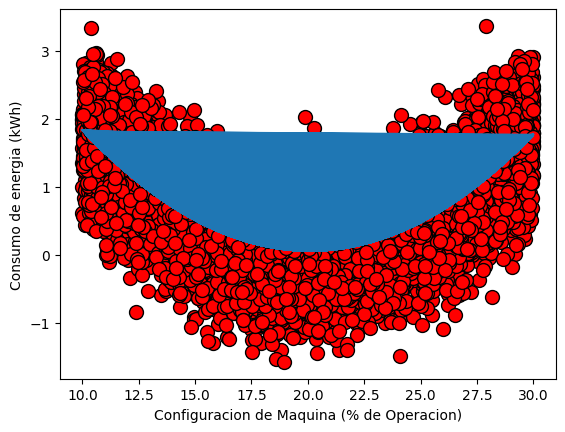

In [25]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')

# Predicciones con la Ecuacion de la normal

In [26]:
datos_para_predecir2 = [17.49080238, 29.01428613, 24.63987884, 21.97316968, 13.12037281, 13.11989041,
                        11.16167224, 27.32352292, 22.02230023, 24.16145156, 10.41168989, 29.39819704,
                        26.64885282, 14.24678221, 13.63649934, 13.6680902, 16.08484486, 20.49512863,
                        18.63890037, 15.8245828, 22.23705789, 12.78987721, 15.84289297, 17.32723687,
                        19.12139968, 25.70351923, 13.99347564, 20.28468877, 21.84829138, 10.92900825,
                        22.15089704, 13.41048247, 11.30103186, 28.97771075, 29.31264066, 26.16794696,
                        16.09227538, 11.95344228, 23.68466053, 18.80304987, 12.4407647, 19.9035382,
                        10.68777042, 28.18640804, 15.17559963, 23.25044569, 16.23422152, 20.40136042,
                        20.93420559, 13.69708911, 29.39169256, 25.50265647, 28.78997883, 27.89654701,
                        21.95799958, 28.4374847, 11.76985004, 13.91965725, 10.90454578, 16.50660662,
                        17.77354579, 15.42698064, 26.57475018, 17.13506653, 15.61869019, 20.85392166,
                        12.8184845, 26.04393962, 11.49101287, 29.73773873, 25.44489539, 13.97431363,
                        10.11044234, 26.30922857, 24.13714688, 24.58014336, 25.42540693, 11.48089303,
                        17.16931457, 12.31738119, 27.26206852, 22.46596254, 16.6179605, 11.27116701,
                        16.21964643, 16.50366644, 24.59212357, 22.75114943, 27.74425485, 19.4442985,
                        12.39188492, 24.26489574, 25.21570097, 21.22554395, 25.4193436, 19.87591193,
                        20.45465659, 18.55082037, 10.50838253, 12.15782854]

In [27]:
resultadosecua = []
for X in datos_para_predecir2:
    X_array = [1, X, X**2]
    resultado = np.dot(X_array, theta)
    resultadosecua.append(round(resultado, 2))  # Redondeamos el resultado a dos decimales

# Imprimir resultados de forma más legible
for resultado in resultadosecua:
    print(resultado)

0.18
1.45
0.42
0.12
0.91
0.91
1.45
0.97
0.13
0.35
1.7
1.57
0.81
0.66
0.79
0.78
0.34
0.06
0.1
0.38
0.14
0.99
0.38
0.19
0.08
0.61
0.71
0.06
0.11
1.53
0.13
0.84
1.41
1.44
1.54
0.7
0.34
1.22
0.29
0.09
1.08
0.06
1.6
1.2
0.48
0.23
0.32
0.06
0.07
0.78
1.57
0.57
1.38
1.12
0.12
1.27
1.27
0.73
1.53
0.29
0.16
0.44
0.79
0.21
0.41
0.07
0.98
0.68
1.35
1.68
0.56
0.71
1.8
0.73
0.35
0.41
0.56
1.36
0.21
1.12
0.96
0.16
0.27
1.42
0.32
0.29
0.41
0.18
1.08
0.07
1.1
0.36
0.52
0.08
0.55
0.06
0.06
0.1
1.66
1.16


### Podemos observar que los valores predichos en comparacion de los originales varian un poco pero son muy aceptables, lo que notamos tambien es que con el metodo de la ecuacion normal nos aproximamos mas en comparacion al otro metodo. De esta manera tenemos resuelto esta parte
### A continuacion veremos el metodo de regresion lineal multivariable

# Regresion Lineal Multivariable
### Aqui veremos el metodo de regresion lineal pero usando todas las columnas de X para predecir Y

In [28]:
data = 'machine_energy_consumption_realistic.csv'

df = pd.read_csv(data)


# Seleccionar columnas específicas por índice
column_indices = [0,2,3,4,5,6,7,8,9,10,11]  
X = df.iloc[:, column_indices]
y = df.iloc[:, 1]

X_numpy = X.to_numpy()
y_numpy = y.to_numpy()

m = y.size  

# para almacenar los valores de X para usarlos en predicciones mas adelante
X_usar_para_predecir = []

for i in range(100):
    fila = X.iloc[i].values
    X_usar_para_predecir.append(fila)  

print(X)
print(y)



       MachineSetting  Temperature  Pressure   Humidity  Vibration       Load  \
0           17.490802    36.892070  3.549720  28.916184   1.487723  45.180114   
1           29.014286    25.960669  6.269169  62.580379   1.117138  36.382318   
2           24.639879    32.499606  8.109491  85.080921   0.509715  79.242228   
3           21.973170    22.669763  5.190553  94.560728   4.012360  12.612371   
4           13.120373    48.209428  3.476926  22.717679   3.604103  81.397627   
...               ...          ...       ...        ...        ...        ...   
14995       23.017670    30.763643  8.351000  85.550133   2.253867  84.086207   
14996       13.555967    56.442487  4.917568  50.267243   4.238357  57.484958   
14997       11.024791    99.978425  2.009996  93.268629   1.202875  85.750554   
14998       23.659232    84.900822  8.697942  21.167726   4.229671  74.125529   
14999       15.021580    55.379296  2.797144  73.199440   3.892124  18.491075   

             Speed       Po

In [29]:
print(X_usar_para_predecir)

[array([1.74908024e+01, 3.68920705e+01, 3.54972014e+00, 2.89161843e+01,
       1.48772273e+00, 4.51801139e+01, 8.50869926e+02, 7.56822643e+01,
       4.46967947e+02, 3.18722862e+02, 3.34893910e-01]), array([ 29.01428613,  25.96066892,   6.26916881,  62.58037932,
         1.11713792,  36.38231787, 500.2738676 , 222.17776638,
       327.99521287, 227.30349426,  78.68368877]), array([2.46398788e+01, 3.24996062e+01, 8.10949094e+00, 8.50809208e+01,
       5.09714784e-01, 7.92422283e+01, 1.00285462e+03, 2.44014069e+02,
       4.09466902e+02, 2.35990471e+02, 5.41460001e+00]), array([ 21.97316968,  22.6697632 ,   5.19055293,  94.56072763,
         4.01235995,  12.6123713 , 984.63337376, 272.4305684 ,
        61.31316659, 299.43472366,  32.77895331]), array([  13.12037281,   48.20942849,    3.47692558,   22.71767943,
          3.60410275,   81.39762717, 1250.87243467,  286.48646022,
        265.16012661,  257.42164886,   69.27974767]), array([ 13.11989041,  21.77885625,   7.83880095,  15.114281

In [30]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [31]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       MachineSetting  Temperature  Pressure   Humidity  Vibration       Load  \
0           17.490802    36.892070  3.549720  28.916184   1.487723  45.180114   
1           29.014286    25.960669  6.269169  62.580379   1.117138  36.382318   
2           24.639879    32.499606  8.109491  85.080921   0.509715  79.242228   
3           21.973170    22.669763  5.190553  94.560728   4.012360  12.612371   
4           13.120373    48.209428  3.476926  22.717679   3.604103  81.397627   
...               ...          ...       ...        ...        ...        ...   
14995       23.017670    30.763643  8.351000  85.550133   2.253867  84.086207   
14996       13.555967    56.442487  4.917568  50.267243   4.238357  57.484958   
14997       11.024791    99.978425  2.009996  93.268629   1.202875  85.750554   
14998       23.659232    84.900822  8.697942  21.167726   4.229671  74.125529   
14999       15.021580    55.379296  2.797144  73.199440   3.892124  18.491075   

             Speed       Po

In [32]:
# Añade el termino de interseccion a X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -0.42269674 -1.00581799 ...  1.37103067  0.18107845
  -1.72970111]
 [ 1.          1.57318721 -1.47807137 ...  0.54690949 -1.58447964
   0.9890799 ]
 [ 1.          0.81553358 -1.19557921 ...  1.11126186 -1.41671036
  -1.55343027]
 ...
 [ 1.         -1.54261923  1.71960967 ...  0.02968301 -0.14549294
   1.22148796]
 [ 1.          0.64568412  1.06823397 ... -1.19794992 -0.1368788
   0.16435157]
 [ 1.         -0.85036952 -0.20714137 ... -0.34687045  1.4580995
  -1.15691351]]


In [33]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [34]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 6.42520303e-01 -2.21268233e-02  4.89896624e-03  6.14116492e-04
  1.75962582e-03 -7.92727537e-04 -1.98978009e-04  4.86257310e-03
 -3.14041817e-03  5.82675048e-03 -2.91420858e-03 -2.53502466e-03]


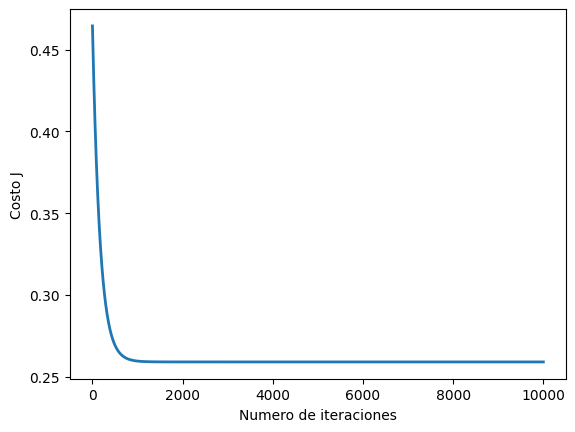

In [35]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003 
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [36]:
X_array = [1,21.973170,	22.669763,	5.190553,	94.560728,	4.012360,	12.612371,	984.633374,	272.430568,	61.313167,	299.434724,	32.778953]
X_array[1:] = (X_array[1:] - mu) / sigma

In [37]:
price = np.dot(X_array, theta)

print('El valor predecido es : {:.2f}'.format(price))

El valor predecido es : 0.62


Predicciones paara comprobar

In [38]:
for fila in X_usar_para_predecir:
    X_array = np.array([1] + list(fila))  
    # Calcular la predicción
    price = np.dot(X_array, theta)

    # Imprimir el resultado
    print('El valor predecido es : {:.2f}'.format(price))


El valor predecido es : 6.05
El valor predecido es : 3.02
El valor predecido es : 6.19
El valor predecido es : 3.77
El valor predecido es : 6.41
El valor predecido es : 5.87
El valor predecido es : 3.80
El valor predecido es : 5.49
El valor predecido es : 6.84
El valor predecido es : 7.87
El valor predecido es : 4.01
El valor predecido es : 5.66
El valor predecido es : 6.08
El valor predecido es : 4.96
El valor predecido es : 2.71
El valor predecido es : 3.22
El valor predecido es : 4.64
El valor predecido es : 2.90
El valor predecido es : 6.00
El valor predecido es : 4.92
El valor predecido es : 5.01
El valor predecido es : 7.33
El valor predecido es : 4.42
El valor predecido es : 3.18
El valor predecido es : 6.57
El valor predecido es : 2.97
El valor predecido es : 6.77
El valor predecido es : 7.07
El valor predecido es : 6.45
El valor predecido es : 5.29
El valor predecido es : 5.77
El valor predecido es : 1.98
El valor predecido es : 1.99
El valor predecido es : 5.39
El valor prede

# Ecuacion de la Normal
### Aqui veremos el metodo de ecuacion normal pero multivariable usando todas las columnas de X para ver los resultados posteriormente

In [39]:
data = 'machine_energy_consumption_realistic.csv'

df = pd.read_csv(data)

# Seleccionar columnas específicas por índice
column_indices = [0,2,3,4,5,6,7,8,9,10,11]  # Ejemplo de índices de columnas
X = df.iloc[:, column_indices]
y = df.iloc[:, 1]
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [40]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [41]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

#Realizamos una estimacion para hacer una prueba
X_array = [1,29.014286,	25.960669,	6.269169,	62.580379,	1.117138,	36.382318,	500.273868,	222.177766,	327.995213,	227.303494,	78.68368]
price = np.dot(X_array, theta)

print('El valor predecico es : {:.2f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 7.06085200e-01 -3.83239758e-03  2.11642884e-04  2.35790710e-04
  6.09049597e-05 -5.47211889e-04 -8.64784674e-06  1.68319144e-05
 -4.35026423e-05  4.03617560e-05 -5.62813404e-05 -8.79678741e-05]
El valor predecico es : 0.60


### Podemos observar que los resultados son aceptables, hay un poco de variacion pero como se menciono en clases jamas sera igual, asi que nos vamos satisfechos de haber aplicado todo lo visto en clases y sobre haber aprendido